# TikTok Project

## Build a Dataframe
Importing of pandas and numpy other than the actual dataframe we are gonna be working on.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/Users/edoardochiari/Desktop/Google Projects/CSV/tiktok_dataset.csv')

## Inspect the data
View and inspect summary informations about the dataframe

In [44]:
# Display and examine the first 10 rows of the dataframe
df.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


In [45]:
# Get summary info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [46]:
# Get summary statistics
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


The dataframe contains a mix of categorical, text, and numerical data. Each row represents a unique TikTok video, capturing either a claim or an opinion, along with accompanying metadata for that video.

In terms of data types, the dataframe comprises five float64 columns, three int64 columns, and four object-type columns, with a total of 19,382 observations. However, several variables have missing values, including claim status, video transcription, and all the count-related variables.

Furthermore, many of the count variables exhibit outliers on the higher end of the distribution. These variables show very large standard deviations and maximum values that are significantly higher than their respective quartile ranges, suggesting the presence of extreme values.

## Understand the data
A good starting point would be to sort and interpret the data tables for the variables related to trip distance and total amount

In [49]:
# What are the different values for claim status and how many of each are in the data?
df['claim_status'].value_counts()

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

The counts of each claim status are quite balanced

In [51]:
# What is the average view count of videos with "claim" status?
claims = df[df['claim_status'] == 'claim']
print('Mean view count claims:', claims['video_view_count'].mean())
print('Median view count claims:', claims['video_view_count'].median())

Mean view count claims: 501029.4527477102
Median view count claims: 501555.0


In [52]:
# What is the average view count of videos with "opinion" status?
opinions = df[df['claim_status'] == 'opinion']
print('Mean view count opinions:', opinions['video_view_count'].mean())
print('Median view count opinions:', opinions['video_view_count'].median())

Mean view count opinions: 4956.43224989447
Median view count opinions: 4953.0


Even though the mean and median within each claim category are close to eachother, there seems to be a great discrepancy between vew counts for videos labeled as claims and videos labeled as opinions

In [54]:
# Get counts for each group combination of claim status and author ban status
df.groupby(['claim_status', 'author_ban_status']).count()[['#']]

#
claim_status author_ban_status      
claim        active             6566
             banned             1439
             under review       1603
opinion      active             8817
             banned              196
             under review        463

There is a clear disparity between the number of claim videos and opinion videos linked to banned authors, with claim videos being much more prevalent. This raises several possibilities. It could be that claim videos face stricter moderation, or perhaps the rules governing claims are more stringent than those for opinions, requiring authors to adhere to a higher standard.

That said, it's impossible to determine whether claim videos are more likely to lead to author bans or if the authors who post claim videos are simply more prone to breaking the platform's rules.

Lastly, while the data offers insight into the status of banned versus active authors, it does not allow conclusions about the specific videos themselves. There’s no way to tell if a particular video resulted in an author's ban, as banned authors could have also posted content that fully adhered to the platform’s terms of service.

In [56]:
df.groupby(['author_ban_status']).agg(
    {'video_view_count': ['mean', 'median'],
     'video_like_count': ['mean', 'median'],
     'video_share_count': ['mean', 'median']})

video_view_count           video_like_count            \
                              mean    median             mean    median   
author_ban_status                                                         
active               215927.039524    8616.0     71036.533836    2222.0   
banned               445845.439144  448201.0    153017.236697  105573.0   
under review         392204.836399  365245.5    128718.050339   71204.5   

                  video_share_count           
                               mean   median  
author_ban_status                             
active                 14111.466164    437.0  
banned                 29998.942508  14468.0  
under review           25774.696999   9444.0

In [57]:
# What's the median video share count of each author ban status?
df.groupby(['author_ban_status']).median(numeric_only=True)[
    ['video_share_count']]

,video_share_count
author_ban_status,
active,437.0
banned,14468.0
under review,9444.0


Banned authors have a median share count that's 33 times the median share count of active authors

In [59]:
df.groupby(['author_ban_status']).agg(
    {'video_view_count': ['count', 'mean', 'median'],
     'video_like_count': ['count', 'mean', 'median'],
     'video_share_count': ['count', 'mean', 'median']
     })

video_view_count                          video_like_count  \
                             count           mean    median            count   
author_ban_status                                                              
active                       15383  215927.039524    8616.0            15383   
banned                        1635  445845.439144  448201.0             1635   
under review                  2066  392204.836399  365245.5             2066   

                                           video_share_count                \
                            mean    median             count          mean   
author_ban_status                                                            
active              71036.533836    2222.0             15383  14111.466164   
banned             153017.236697  105573.0              1635  29998.942508   
under review       128718.050339   71204.5              2066  25774.696999   

                            
                    median  
author_ban_status           
active               437.0  
banned             14468.0  
under review        9444.0

From the table we can clearly see that banned authors and those under review get far more views, likes, and shares than active authors. A key observation is that the mean has a far greater value than the median, suggesting that there might be some videos with high engagement counts.
In order to have a better understanding of the engagement rate, the creation of some variables related to the per view may prove usefull.

In [61]:
# Create a likes_per_view column
df['likes_per_view'] = df['video_like_count'] / df['video_view_count']

# Create a comments_per_view column
df['comments_per_view'] = df['video_comment_count'] / df['video_view_count']

# Create a shares_per_view column
df['shares_per_view'] = df['video_share_count'] / df['video_view_count']

df.groupby(['claim_status', 'author_ban_status']).agg(
    {'likes_per_view': ['count', 'mean', 'median'],
     'comments_per_view': ['count', 'mean', 'median'],
     'shares_per_view': ['count', 'mean', 'median']})

likes_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.329542  0.326538   
             banned                      1439  0.345071  0.358909   
             under review                1603  0.327997  0.320867   
opinion      active                      8817  0.219744  0.218330   
             banned                       196  0.206868  0.198483   
             under review                 463  0.226394  0.228051   

                               comments_per_view                      \
                                           count      mean    median   
claim_status author_ban_status                                         
claim        active                         6566  0.001393  0.000776   
             banned                         1439  0.001377  0.000746   
             under review                   1603  0.001367  0.000789   
opinion      active                         8817  0.000517  0.000252   
             banned                          196  0.000434  0.000193   
             under review                    463  0.000536  0.000293   

                               shares_per_view                      
                                         count      mean    median  
claim_status author_ban_status                                      
claim        active                       6566  0.065456  0.049279  
             banned                       1439  0.067893  0.051606  
             under review                 1603  0.065733  0.049967  
opinion      active                       8817  0.043729  0.032405  
             banned                        196  0.040531  0.030728  
             under review                  463  0.044472  0.035027

Videos from banned authors or those under review tend to attract significantly more views, likes, and shares compared to those from non-banned authors. However, the engagement rate of a video—once it gains attention—seems to be influenced more by whether it is a claim video rather than by the author's ban status.

We also know that claim videos not only receive more views than opinion videos but also tend to generate more likes on average, indicating they are generally better received by audiences. Additionally, claim videos elicit higher engagement through comments and shares compared to opinion videos.

Interestingly, for claim videos, banned authors show slightly higher likes-to-view and shares-to-view ratios than both active authors and those under review. In contrast, for opinion videos, active authors and those under review consistently achieve higher engagement rates across all metrics compared to banned authors.

## Initial Analysis Observations
The dataset consists of 19,382 samples, with just under 50% being claims, totaling 9,608. A strong correlation was observed between engagement levels and claim status, making this an area worthy of further investigation. Additionally, videos posted by banned authors show significantly higher engagement compared to those by active authors, with videos from authors under review falling in between the two groups in terms of engagement. These findings suggest that claim status and author status are important factors influencing video engagement, and both could be key areas for deeper analysis.

## Data Visualization

***Video duration (seconds):***

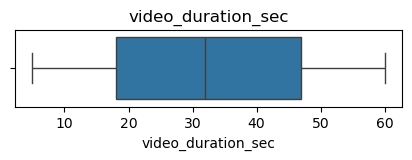

In [66]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(5,1))
plt.title('video_duration_sec')
sns.boxplot(x=df['video_duration_sec']);

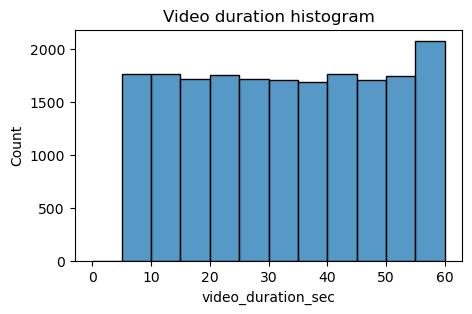

In [67]:
plt.figure(figsize=(5,3))
sns.histplot(df['video_duration_sec'], bins=range(0,61,5))
plt.title('Video duration histogram');

All of the videos are about 5 to 60 seconds in length having a uniform distribution.

***Video view count:***

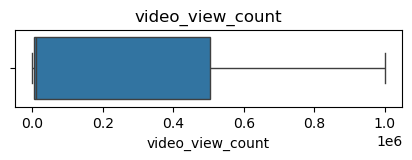

In [70]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(5, 1))
plt.title('video_view_count')
sns.boxplot(x=df['video_view_count']);

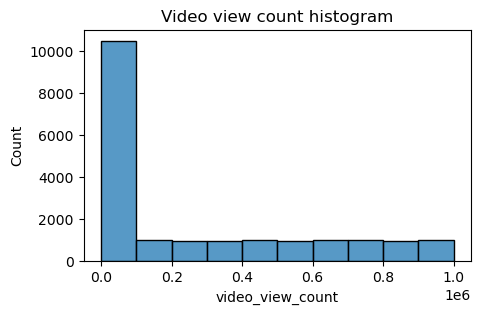

In [71]:
plt.figure(figsize=(5,3))
sns.histplot(df['video_view_count'], bins=range(0,(10**6+1),10**5))
plt.title('Video view count histogram');

The graphs show a very uneven distribution, with more than half of the videos receiving less then 100000 views.

***Video like count:***

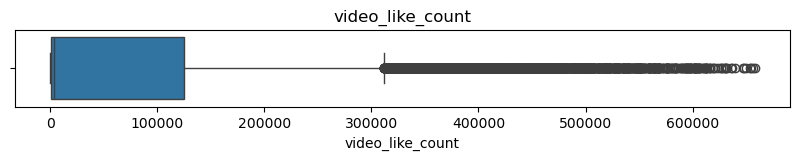

In [74]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(10,1))
plt.title('video_like_count')
sns.boxplot(x=df['video_like_count']);

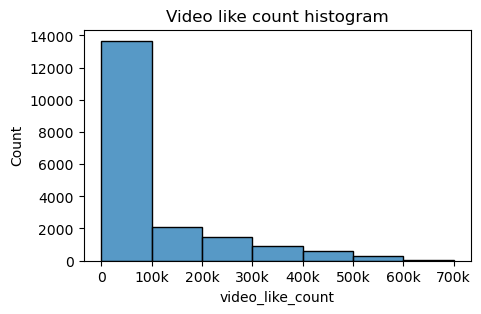

In [75]:
plt.figure(figsize=(5,3))
ax = sns.histplot(df['video_like_count'], bins=range(0,(7*10**5+1),10**5))
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
ax.set_xticks(range(0,7*10**5+1,10**5), labels=labels)
plt.title('Video like count histogram');

The histogram clearly shows a right-skewed distribution of video like counts, with most videos accumulating fewer than 100,000 likes. As the like count increases, the number of videos steadily decreases, creating a long tail effect. This means that while the majority of videos tend to have lower like counts, there are still a number of videos that receive significantly more likes, with some even reaching as high as 700,000. The sharp decline in the count of videos after the first category suggests that achieving a large number of likes is relatively rare, but not impossible.

***Video comment count:***

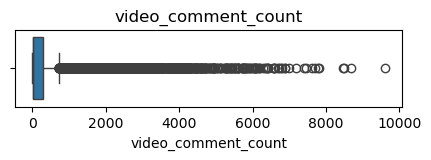

In [78]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(5,1))
plt.title('video_comment_count')
sns.boxplot(x=df['video_comment_count']);

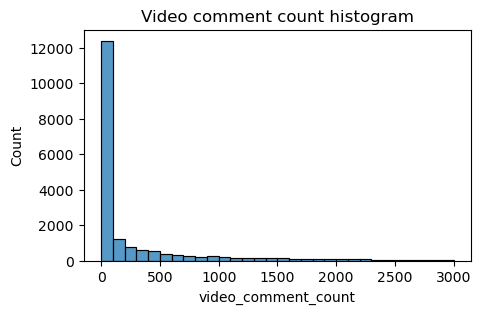

In [79]:
plt.figure(figsize=(5,3))
sns.histplot(df['video_comment_count'], bins=range(0,(3001),100))
plt.title('Video comment count histogram');

Again, the vast majority of videos are grouped at the bottom of the range of values of video comment count. Most videos have fewer than 100 comments.

***Video share count:***

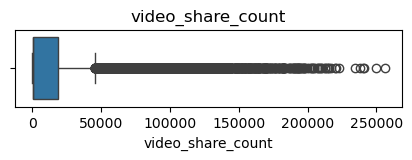

In [82]:
# Create a boxplot to visualize distribution of `video_share_count`
plt.figure(figsize=(5,1))
plt.title('video_share_count')
sns.boxplot(x=df['video_share_count']);

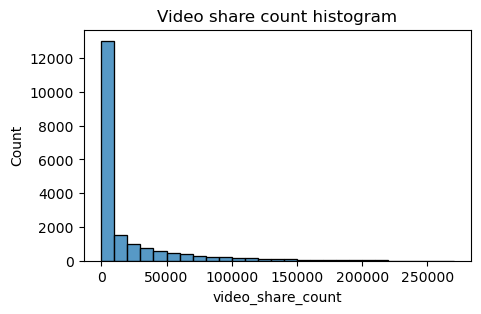

In [83]:
plt.figure(figsize=(5,3))
sns.histplot(df['video_share_count'], bins=range(0,(270001),10000))
plt.title('Video share count histogram');

The vast majority of videos have fewer than 100000 shares.

***Video download count:***

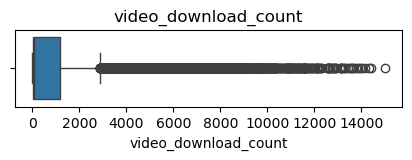

In [86]:
# Create a boxplot to visualize distribution of `video_download_count`
plt.figure(figsize=(5,1))
plt.title('video_download_count')
sns.boxplot(x=df['video_download_count']);

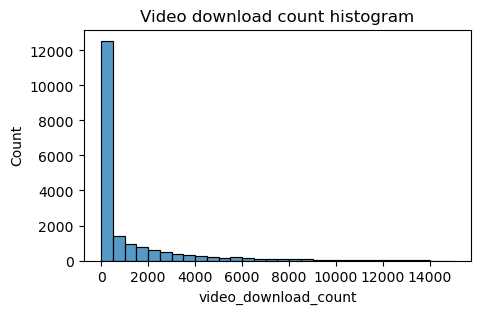

In [87]:
plt.figure(figsize=(5,3))
sns.histplot(df['video_download_count'], bins=range(0,(15001),500))
plt.title('Video download count histogram');

The majority of videos are downloaded fewer than 500 times, but in some cases reaches over the 12000 times mark.

***Claim status by verification status:***

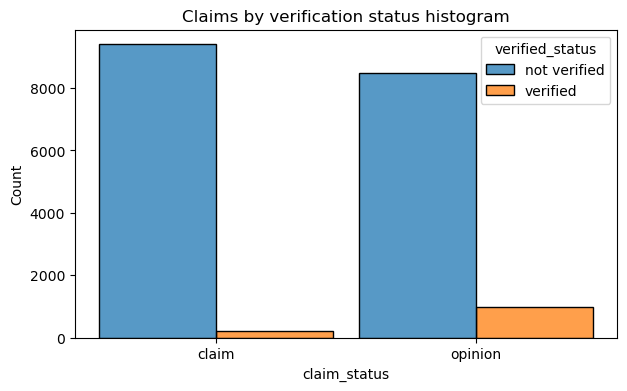

In [90]:
plt.figure(figsize=(7,4))
sns.histplot(data=df,
             x='claim_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.9)
plt.title('Claims by verification status histogram');

There seems to be far fewer verified users than unverified, but if a user is verified, they are more likely to post opinions.

***Claim status by author ban status:***

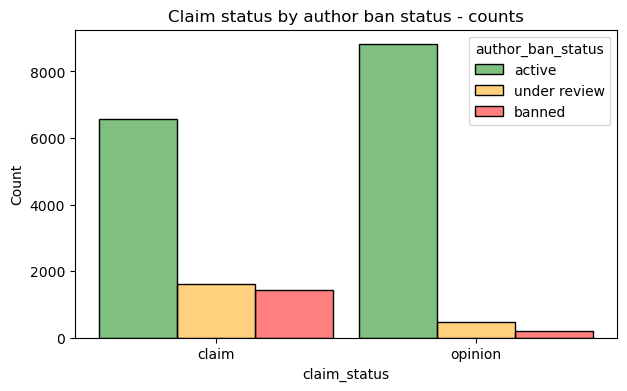

In [93]:
fig = plt.figure(figsize=(7,4))
sns.histplot(df, x='claim_status', hue='author_ban_status',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.9,
             palette={'active':'green', 'under review':'orange', 'banned':'red'},
             alpha=0.5)
plt.title('Claim status by author ban status - counts');

For both claim and opinion videos, there are significantly more active authors compared to those who are banned or under review. However, the percentage of active authors is much higher for opinion videos than for claim videos. This suggests that authors who post claim videos are more likely to face review or banning.

***Median view counts by ban status:***

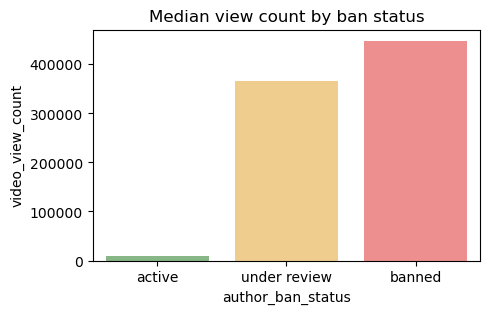

In [96]:
ban_status_counts = df.groupby(['author_ban_status']).median(numeric_only=True).reset_index()

fig = plt.figure(figsize=(5,3))
sns.barplot(data=ban_status_counts,
            x='author_ban_status',
            y='video_view_count',
            hue='author_ban_status',  # Assign hue to the same variable as x
            order=['active', 'under review', 'banned'],
            palette={'active':'green', 'under review':'orange', 'banned':'red'},
            alpha=0.5,
            legend=False)  # Disable the legend as it's redundant
plt.title('Median view count by ban status')
plt.show()


The median view count for non-active authors is significantly higher than that for active authors. Given that non-active authors are more likely to post claims, and their videos tend to receive far more views overall compared to those by active authors, the `video_view_count` could potentially serve as a useful indicator of claim status.

To validate this observation we can quickly check the median view count:

In [98]:
df.groupby('claim_status')['video_view_count'].median()

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

***Total views by claim status:***

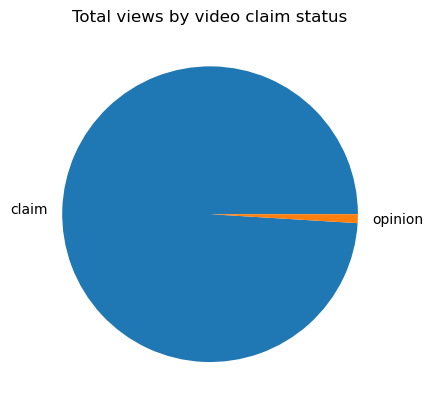

In [100]:

plt.pie(df.groupby('claim_status')['video_view_count'].sum(), labels=['claim', 'opinion'])
plt.title('Total views by video claim status');

The overall view count is dominated by claim videos even though there are roughly the same number of each video in the dataset.

### Outliers determination ###

As the data is being prepared for building a predictive model, outliers could pose a problem. Typically, in a normal distribution, outliers are identified by calculating the interquartile range (IQR) and setting a threshold at 1.5 times the IQR above the 3rd quartile. However, since the counts in this dataset are not normally distributed but instead are heavily skewed to the right, a better approach would be to calculate the median for each variable and add 1.5 times the IQR to it. This would result in a lower threshold than using the 3rd quartile. 

To calculate the quantiles efficiently, a loop can be used:

In [104]:
count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]

for column in count_cols:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    median = df[column].median()
    outlier_threshold = median + 1.5*iqr

    # Count the number of values that exceed the outlier threshold
    outlier_count = (df[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


***Scatterplot:***

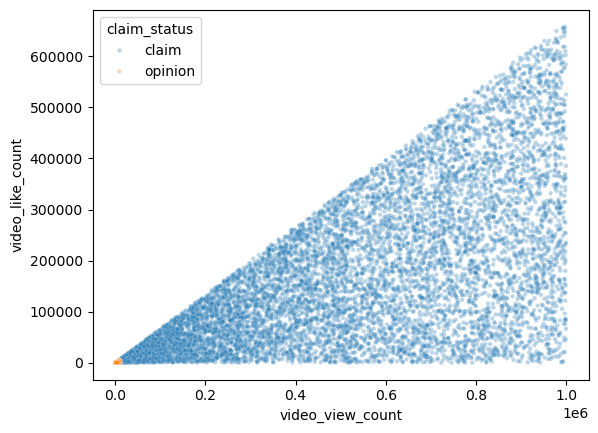

In [106]:
# Create a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
sns.scatterplot(x=df["video_view_count"], y=df["video_like_count"],
                hue=df["claim_status"], s=10, alpha=.3)
plt.show()

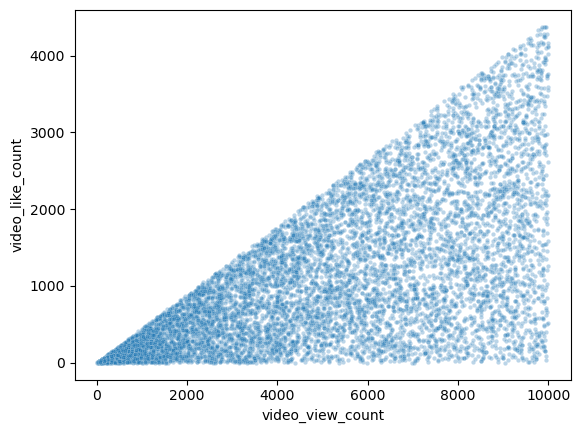

In [107]:
# Create a scatterplot of `video_view_count` versus `video_like_count` for opinions only
opinion = df[df['claim_status']=='opinion']
sns.scatterplot(x=opinion["video_view_count"], y=opinion["video_like_count"],
                 s=10, alpha=.3)
plt.show()

The scatter plots show a positive correlation between video view count and video like count, where higher view counts are generally associated with higher like counts.

In the first graph, representing videos with a wider range of view counts (up to 1 million views), there is a clear triangular shape. This indicates that although most videos with higher view counts also have high like counts, there is variability. Some videos with many views have relatively fewer likes.

The second graph, focusing on videos with fewer views (up to 10,000 views), shows a similar pattern but on a smaller scale. The triangular pattern persists, where more views tend to result in more likes, but some videos with high view counts have surprisingly low likes.

These graphs support the idea that video view count might be a useful predictor for claim status, as suggested earlier, since the behavior of claims and opinions could differ in terms of view and like distribution. You could investigate further by analyzing the claim status along with the view and like counts to check for distinct patterns.

## Statistical Analysis

***Import additional packages***

In [111]:
from scipy import stats

***Hypothesis Testing***

Before conducting the hypothesis testing it's necessary to define the hypothesis for this project.

**$H_0$**: There is no difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to chance or sampling variability).

**$H_A$**: There is a difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to an actual difference in the corresponding population means).

Let's consider a 5% as the significance level and proceed with a two-sample test.

In [114]:
# Drop all the rows with missing values
df = df.dropna(axis=0)

# Save each sample in a variable
not_verified = df[df["verified_status"] == "not verified"]["video_view_count"]
verified = df[df["verified_status"] == "verified"]["video_view_count"]

# Implement a t-test using the two samples
stats.ttest_ind(a=not_verified, b=verified, equal_var=False)

TtestResult(statistic=25.499441780633777, pvalue=2.6088823687177823e-120, df=1571.163074387424)

Given that the p-value is extremely smaller than the significance level of 5%, the null hypothesis is rejected. This implies that there is a statistically significant difference in the mean video view count between verified and unverified accounts on TikTok.

***Insights***

The analysis shows that there is a statistically significant difference in the average view counts between videos from verified accounts and videos from unverified accounts. This suggests that there might be fundamental behavioral differences between these two groups of accounts, such as differences in audience engagement, content visibility, or even platform algorithms favoring verified users. Verified accounts may benefit from higher credibility, which can attract more viewers, while unverified accounts may struggle to gain the same level of attention. Understanding these differences could provide valuable insights for content strategy and platform management.

## Regression modelling

In [119]:
# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Boxplots

Check for and handle outliers through the use of boxplots

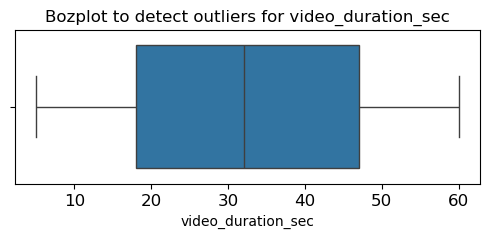

In [122]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize = (6,2))
plt.title('Bozplot to detect outliers for video_duration_sec', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['video_duration_sec'])
plt.show()

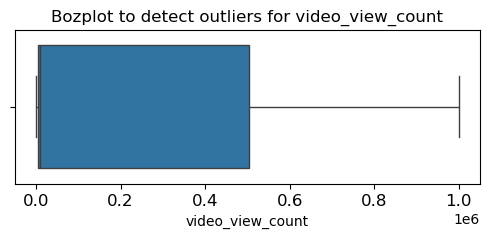

In [123]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize = (6,2))
plt.title('Bozplot to detect outliers for video_view_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['video_view_count'])
plt.show()

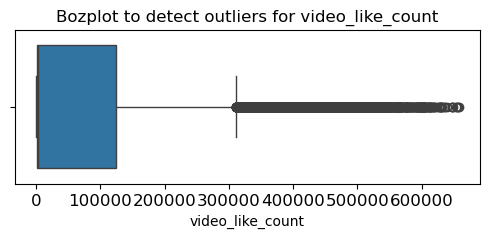

In [124]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize = (6,2))
plt.title('Bozplot to detect outliers for video_like_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['video_like_count'])
plt.show()

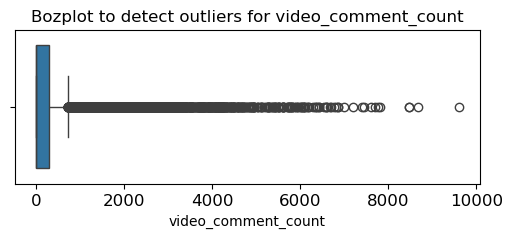

In [125]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize = (6,2))
plt.title('Bozplot to detect outliers for video_comment_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['video_comment_count'])
plt.show()

Given the insane amount of outliers when considering both the like and video count, further studies are needed.

In [127]:
# Like count outliers
percentile25 = df['video_like_count'].quantile(0.25)
percentile75 = df['video_like_count'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
df.loc[df['video_like_count'] > upper_limit, 'video_like_count'] = upper_limit

In [128]:
# Like count outliers
percentile25 = df['video_comment_count'].quantile(0.25)
percentile75 = df['video_comment_count'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
df.loc[df['video_comment_count'] > upper_limit, 'video_comment_count'] = upper_limit

Now let's check the target variable for class balance, keeping in mind that the goal is to predict whether the user of a given post is verified or unverified.

In [130]:
# Check for class balance
df['verified_status'].value_counts(normalize=True)

verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64

From the data we can see that approximately 94% of the dataset represents videos posted by unverified accounts and 6% represents videos posted by verified accounts. So the outcome variable is not very balanced.

Using resampling to create class balance in the outcome variable is a good option.

In [132]:
# Use resampling to create class balance in the outcome variable, if needed

# Identify data points from majority and minority classes
data_majority = df[df["verified_status"] == "not verified"]
data_minority = df[df["verified_status"] == "verified"]

# Upsample the minority class (which is "verified")
data_minority_upsampled = resample(data_minority,
                                 replace=True,                 # to sample with replacement
                                 n_samples=len(data_majority), # to match majority class
                                 random_state=0)               # to create reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

# Display new class counts
data_upsampled["verified_status"].value_counts()

verified_status
not verified    17884
verified        17884
Name: count, dtype: int64

Now that the dataset is balanced, we get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.

In [134]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
data_upsampled[["verified_status", "video_transcription_text"]].groupby(by="verified_status")[["video_transcription_text"]].agg(func=lambda array: np.mean([len(text) for text in array]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


Extract the lenght of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [183]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data_upsampled["text_length"] = data_upsampled["video_transcription_text"].apply(func=lambda text: len(text))
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000000,0.000702,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.004855,0.135111,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.000365,0.003168,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.001335,0.079569,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.002706,0.073175,128


A good idea could be to create a visualization in order to see the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

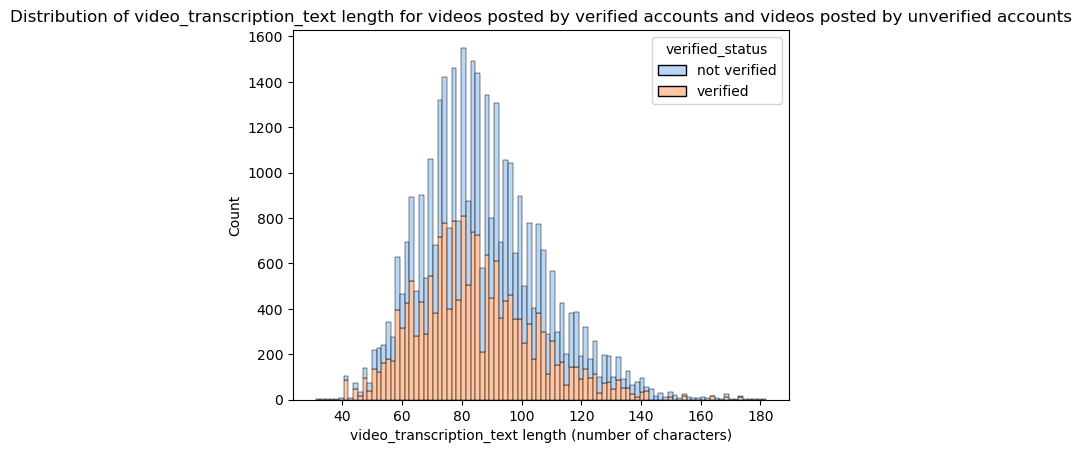

In [186]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot
sns.histplot(data=data_upsampled, stat="count", multiple="stack", x="text_length", kde=False, palette="pastel", 
             hue="verified_status", element="bars", legend=True)
plt.title("Seaborn Stacked Histogram")
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for videos posted by verified accounts and videos posted by unverified accounts")
plt.show()

### Examine correlations

Next we code a correlation matrix to help determine most correlated variables.

In [190]:
# Code a correlation matrix to help determine most correlated variables
data_upsampled.corr(numeric_only=True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view,text_length
#,1.000000,-0.000853,-0.011729,-0.697007,-0.626385,-0.504015,-0.487096,-0.608773,-0.282755,-0.311144,-0.214349,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.005993,0.010515,0.008753,0.012674,-0.005539,0.005954,-0.001698,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004494,0.002206,0.003989,-0.001086,-0.003731,-0.021063,0.001244,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.856937,0.711313,0.690048,0.748361,0.278638,0.292290,0.204884,0.244693
video_like_count,-0.626385,0.005993,0.004494,0.856937,1.000000,0.832146,0.805543,0.818032,0.565200,0.442375,0.404021,0.216693
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.832146,1.000000,0.710117,0.671335,0.485643,0.389892,0.594859,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.805543,0.710117,1.000000,0.793668,0.476817,0.600509,0.343180,0.173396
video_comment_count,-0.608773,0.012674,-0.001086,0.748361,0.818032,0.671335,0.793668,1.000000,0.455890,0.634753,0.332204,0.217661
likes_per_view,-0.282755,-0.005539,-0.003731,0.278638,0.565200,0.485643,0.476817,0.455890,1.000000,0.539845,0.675187,0.094428
comments_per_view,-0.311144,0.005954,-0.021063,0.292290,0.442375,0.389892,0.600509,0.634753,0.539845,1.000000,0.394044,0.114497


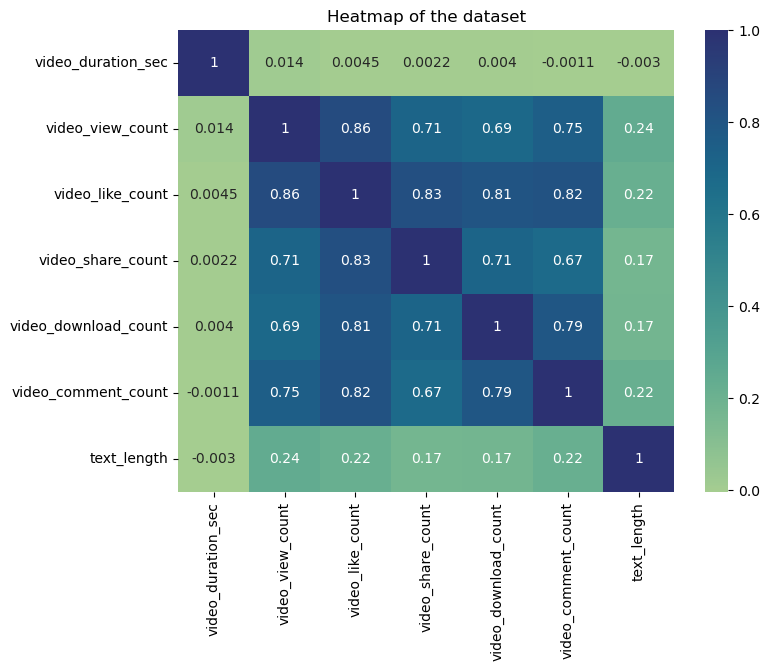

In [192]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(
    data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", 
                    "video_like_count", "video_share_count", "video_download_count", "video_comment_count", "text_length"]]
    .corr(numeric_only=True), 
    annot=True, 
    cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()

The above heatmap shows that the following pair of variables are strongly correlated: `video_view_count` and `video_like_count` (0.86 correlation coefficient).

Given that one of the models assumptions for logistic regression is no severe multicollinearity among the features, exclusion of `video_like_count` could prove usefull. On the other hand, some variables that should be kept are `video_view_count` , `video_share_count` , `video_download_count` , and `video_comment_count` as features.

### Select variables

Setting y and X 

In [198]:
# Select outcome variable(y) and features(X)
y = data_upsampled['verified_status']
X = data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count"]]
X.head()

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,59,claim,under review,343296.0,241.0,1.0,0.0
1,32,claim,active,140877.0,19034.0,1161.0,684.0
2,31,claim,active,902185.0,2858.0,833.0,329.0
3,25,claim,active,437506.0,34812.0,1234.0,584.0
4,19,claim,active,56167.0,4110.0,547.0,152.0


When selecting the features, `#` and `video_id` are not selected because they do not seem to be helpful for predicting whether a video presents a claim or an opinion. Also `video_like_count` is not selected because of its strong correlation with other features.

### Train_test split

Split the data into training and testing sets.

In [206]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Get shape of each training and testing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26826, 7), (8942, 7), (26826,), (8942,))

Both the numbers of features(7) and rows align between the features and the outcome vareiable for both training and testing.

### Encode variables

Check the data types of the features.

In [217]:
# Check data types
X_train.dtypes

# Get unique values in `claim_status`
X_train["claim_status"].unique()

array(['opinion', 'claim'], dtype=object)

In [219]:
# Get unique values in `author_ban_status`
X_train["author_ban_status"].unique()

array(['active', 'under review', 'banned'], dtype=object)

Both the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklean` , these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

In [222]:
# Select the training features that needs to be encoded
X_train_to_encode = X_train[["claim_status", "author_ban_status"]]

#Display first few rows
X_train_to_encode.head()

,claim_status,author_ban_status
33058,opinion,active
20491,opinion,active
25583,opinion,active
18474,opinion,active
27312,opinion,active


In [224]:
# Set up an encoder for one-hot encoding the categorical features
X_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the training features using the encoder
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)

#Get feature names from encoder
X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [226]:
# Display first few rows of encoded training features
X_train_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [228]:
# Place encoded training features (which is currently an array) into a dataframe
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [230]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_train.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
33058,33,2252.0,23.0,4.0,0.0
20491,52,6664.0,550.0,53.0,2.0
25583,37,6327.0,257.0,3.0,0.0
18474,57,1702.0,28.0,0.0,0.0
27312,21,3842.0,101.0,1.0,0.0


In [232]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
X_train_final = pd.concat([X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_train_encoded_df], axis=1)

# Display first few rows
X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,33,2252.0,23.0,4.0,0.0,1.0,0.0,0.0
1,52,6664.0,550.0,53.0,2.0,1.0,0.0,0.0
2,37,6327.0,257.0,3.0,0.0,1.0,0.0,0.0
3,57,1702.0,28.0,0.0,0.0,1.0,0.0,0.0
4,21,3842.0,101.0,1.0,0.0,1.0,0.0,0.0


We recheck the data types of the outcome variable.

In [239]:
# Check data type of outcome variable
y_train.dtype

dtype('O')

In [241]:
# Get unique values of outcome variable
y_train.unique()

array(['verified', 'not verified'], dtype=object)

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.

In [245]:
# Set up an encoder for one-hot encoding the categorical outcome variable
y_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [247]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Display the encoded training outcome variable
y_train_final

array([1., 1., 1., ..., 1., 1., 0.])

### Model building

Construct a model and fit it to the training set.

In [251]:
# Construct a logistic regression model and fit it to the training set
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_final, y_train_final)

### Results and evaluation

Evaluate the model rembering to encode categorical features in the testing set using an appropriate method.

In [255]:
# Select the testing features that needs to be encoded
X_test_to_encode = X_test[["claim_status", "author_ban_status"]]

# Display first few rows
X_test_to_encode.head()

,claim_status,author_ban_status
21061,opinion,active
31748,opinion,active
20197,claim,active
5727,claim,active
11607,opinion,active


In [257]:
# Transform the testing features using the encoder
X_test_encoded = X_encoder.transform(X_test_to_encode)

# Display first few rows of encoded testing features
X_test_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [260]:
# Place encoded testing features (which is currently an array) into a dataframe
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
X_test_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [262]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_test.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
21061,41,2118.0,57.0,5.0,2.0
31748,27,5701.0,157.0,1.0,0.0
20197,31,449767.0,75385.0,5956.0,728.5
5727,19,792813.0,56597.0,5146.0,728.5
11607,54,2044.0,68.0,19.0,2.0


In [266]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
X_test_final = pd.concat([X_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_test_encoded_df], axis=1)

# Display first few rows
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,41,2118.0,57.0,5.0,2.0,1.0,0.0,0.0
1,27,5701.0,157.0,1.0,0.0,1.0,0.0,0.0
2,31,449767.0,75385.0,5956.0,728.5,0.0,0.0,0.0
3,19,792813.0,56597.0,5146.0,728.5,0.0,0.0,0.0
4,54,2044.0,68.0,19.0,2.0,1.0,0.0,0.0


We test the logistic regression model, using the model to make predictions on the encoded testing set.

In [272]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred = log_clf.predict(X_test_final)
y_pred

array([1., 1., 0., ..., 1., 0., 1.])

Display the true labels of the testing set.

In [277]:
# Display the true lables of the testing set
y_test

21061        verified
31748        verified
20197        verified
5727     not verified
11607    not verified
             ...     
14756    not verified
26564        verified
14800    not verified
35705        verified
31060        verified
Name: verified_status, Length: 8942, dtype: object

Encode the true labels of the testing set so it can be compared to the predictions.

In [280]:
# Encode the testing outcome variable
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

# Display the encoded testing outcome variable
y_test_final

array([1., 1., 1., ..., 0., 1., 1.])

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [283]:
# Get shape of each training and testing set
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape

((26826, 8), (26826,), (8942, 8), (8942,))

Also in this case, both the numbers of features(8) and rows align between the features and the outcome vareiable for both training and testing.

### Visualize model results

Create a confusion matrix to visualize the results of the logistic regression model.

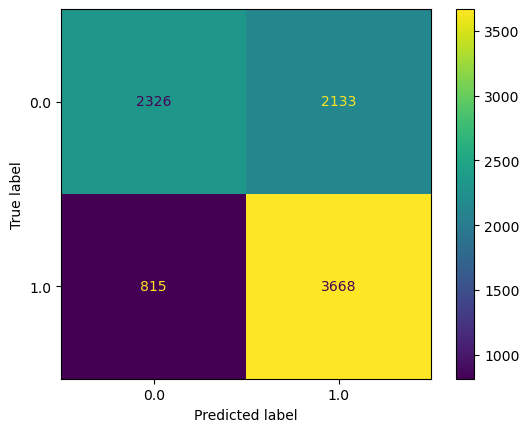

In [288]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

In [290]:
(3668 + 2326) / (3668 + 815 + 2133 + 2326) 

0.6703198389622008

The upper-left quadrant displays the number of true negatives: the number of videos posted by unverified accounts that the model accurately classified as so.

The upper-right quadrant displays the number of false positives: the number of videos posted by unverified accounts that the model misclassified as posted by verified accounts.

The lower-left quadrant displays the number of false negatives: the number of videos posted by verified accounts that the model misclassified as posted by unverified accounts.

The lower-right quadrant displays the number of true positives: the number of videos posted by verified accounts that the model accurately classified as so.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives

Let's create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [294]:
# Create classification report for logistic regression model
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.52      0.61      4459
not verified       0.63      0.82      0.71      4483

    accuracy                           0.67      8942
   macro avg       0.69      0.67      0.66      8942
weighted avg       0.69      0.67      0.66      8942



The classification report above shows that the logistic regression model achieved a precision of 63% and a recall of 82%, and it achieved an accuracy of 67%. Note that the precision and recall scores are taken from the "not verified" row of the output because that is the target class that we are most interested in predicting. The "verified" class has its own precision/recall metrics, and the weighted average represents the combined metrics for both classes of the target variable.

### Interpret model coefficients

In [298]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,-2.453706e-03
1,video_view_count,-1.688457e-07
2,video_share_count,4.825937e-06
3,video_download_count,-8.108215e-05
4,video_comment_count,4.482960e-04
5,claim_status_opinion,1.702612e+00
6,author_ban_status_banned,-4.484298e-01
7,author_ban_status_under review,-9.866365e-02


- The dataset has a few strongly correlated variables, which might lead to multicollinearity issues when fitting a logistic regression model. We decided to drop `video_like_count` from the model building.
- Based on the logistic regression model, each additional second of the video is associated with 0.009 increase in the log-odds of the user having a verified status.
- The logistic regression model had not great, but acceptable predictive power: a precision of 63% is less than ideal, but a recall of 82% is very good. Overall accuracy is towards the lower end of what would typically be considered acceptable.

We developed a logistic regression model for verified status based on video features. The model had decent predictive power. Based on the estimated model coefficients from the logistic regression, longer videos tend to be associated with higher odds of the user being verified. Other video features have small estimated coefficients in the model, so their association with verified status seems to be small.